## Star Wars Movie Rankings & Fan Characteristics

In this project, we'll analyze the results of a survey about the popularity of different Star Wars films.
The [original survey data](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) was collected by Walt Hickey at fivethirtyeight.com.

First we'll read in the data and clean it. 

In [1]:
import pandas as pd
pd.options.display.max_columns = 40
star_wars = pd.read_csv('StarWars.csv', encoding = 'latin')

star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Column Names
The first row shows extra info about the columns in some cases. To clean this, I'll rename the columns to include that info and then delete the extra row.

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#first row
survey_additional_info = star_wars.iloc[0]

#Uncomment to see first row:
#print(survey_additional_info)

In [4]:
#new column names
col_names = {
    'Have you seen any of the 6 films in the Star Wars franchise?' : 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'sw_fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
    'Unnamed: 4' : 'seen2',
    'Unnamed: 5' : 'seen3',
    'Unnamed: 6' : 'seen4',
    'Unnamed: 7' : 'seen5',
    'Unnamed: 8' : 'seen6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'rank1',
    'Unnamed: 10' : 'rank2',
    'Unnamed: 11' : 'rank3',
    'Unnamed: 12' : 'rank4',
    'Unnamed: 13' : 'rank5',
    'Unnamed: 14' : 'rank6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16' : 'Luke Skywalker',
    'Unnamed: 17' : 'Princess Leia Organa',
    'Unnamed: 18' : 'Anakin Skywalker',
    'Unnamed: 19' : 'Obi Wan Kenobi',
    'Unnamed: 20' : 'Emperor Palpatine',
    'Unnamed: 21' : 'Darth Vader',
    'Unnamed: 22' : 'Lando Calrissian',
    'Unnamed: 23' : 'Boba Fett',
    'Unnamed: 24' : 'C-3P0',
    'Unnamed: 25' : 'R2 D2',
    'Unnamed: 26' : 'Jar Jar Binks',
    'Unnamed: 27' : 'Padme Amidala',
    'Unnamed: 28' : 'Yoda',
    'Are you familiar with the Expanded Universe?' : 'expand_know',
    'Do you consider yourself to be a fan of the Expanded Universe?æ' : 'expand_fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'st_fan'}

In [5]:
star_wars.rename(columns = col_names, inplace = True)

star_wars.columns

Index(['RespondentID', 'seen_any', 'sw_fan', 'seen1', 'seen2', 'seen3',
       'seen4', 'seen5', 'seen6', 'rank1', 'rank2', 'rank3', 'rank4', 'rank5',
       'rank6', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'expand_know', 'expand_fan', 'st_fan', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

In [6]:
#Now deleting header row
star_wars = star_wars.drop([0])

## Column Summary 

The columns we'll refer to are:

Column | Description
--- | :---
`seen_any` | Whether respondent has seen any film
`seen_x` | Whether respondent has seen Episode x
`rank_x` | Respondent's ranking of Episode x (1 = best, 6 = worst)
`st_fan` | Whether respondent is a Star Trek Fan
`Gender` | Respondents's gender
`Age` | Respondent's age group


Next we confirm there are no rows without a respondent ID, to avoid null values:

In [7]:
print(star_wars.shape)

print(star_wars['RespondentID'].notnull().sum())

#Note could drop null rows with a boolean: star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

(1186, 38)
1186


## Cleaning Boolean Data Columns

From the `sw_fan` column we can count the number of fans:

In [8]:
#how many star wars fans?
star_wars['sw_fan'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: sw_fan, dtype: int64

We can also see that response are yes/no. We convert these to Boolean values to aid further data processing.

In [9]:
yes_no = {'Yes' : True, 'No' : False}

cols_yes_no = ['seen_any', 'sw_fan', 'expand_know', 'expand_fan', 'st_fan']

for col in cols_yes_no:
    star_wars[col] = star_wars[col].map(yes_no)

Additionally, we change the `seen_x` columns to Boolean values:

In [10]:
#relabeling seen movies to booleans
import numpy as np
seen_map = {'Star Wars: Episode I  The Phantom Menace': True, 
            'Star Wars: Episode II  Attack of the Clones': True, 
            'Star Wars: Episode III  Revenge of the Sith' : True,
            'Star Wars: Episode IV  A New Hope' : True, 
            'Star Wars: Episode V The Empire Strikes Back' : True,
            'Star Wars: Episode VI Return of the Jedi' : True, 
            np.NaN : False}
            
for n in range(1,7):
    star_wars['seen{}'.format(n)] = star_wars['seen{}'.format(n)].map(seen_map)

## Sample of Cleaned Data

In [11]:
star_wars.head()

,RespondentID,seen_any,sw_fan,seen1,seen2,seen3,seen4,seen5,seen6,rank1,rank2,rank3,rank4,rank5,rank6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,expand_know,expand_fan,st_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Average Movie Rankings

The data is now cleaned and analysis can begin. We convert rankings to floats in order to calculate mean rankings.

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
rank_cols = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6']

star_wars[rank_cols].mean()

rank1    3.732934
rank2    4.087321
rank3    4.341317
rank4    3.272727
rank5    2.513158
rank6    3.047847
dtype: float64

Below we visualize these means.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

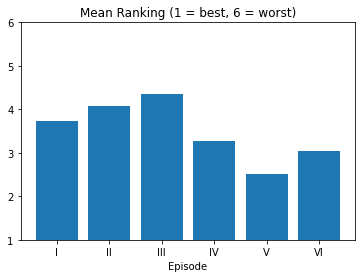

In [15]:
fig, ax = plt.subplots()

ax.bar(range(1,7), star_wars[rank_cols].mean())

ax.set_xticks(range(1,7))
ax.set_title('Mean Ranking (1 = best, 6 = worst)')
ax.set_xlabel('Episode')
ax.set_xticklabels(['I','II','III','IV','V','VI'])
ax.set_ylim((1,6))

plt.show()

The above chart is a bit confusing, as we usually associate a taller bar with a higher ranking. We can achieve this by inverting the rankings, so that 1 = worst and 6 = best:

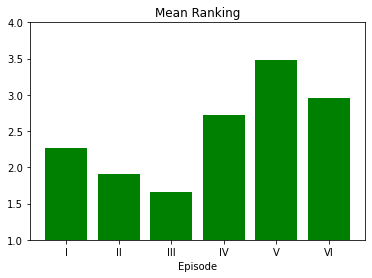

In [16]:
for col in rank_cols:
    star_wars['invert_'+col] = 6 - star_wars[col]

invert_rank_cols = ['invert_'+col for col in rank_cols]
fig, ax = plt.subplots()


ax.bar(range(1,7), star_wars[invert_rank_cols].mean(), color = 'green')

ax.set_xticks(range(1,7))
ax.set_title('Mean Ranking')
ax.set_xlabel('Episode')
ax.set_xticklabels(['I','II','III','IV','V','VI'])
ax.set_ylim((1,4))

plt.show()

The most popular movie, on average, was Episode V: The Empire Strikes Back. The other two original movies follow. The prequels are less popular and decrease in popularity from Episode I to Episode III. Which makes sense because those movies were garbage compared to the originals! Don't worry though, this is a very objective analysis.

We'll continue to use the rankings 1 = best, 6 = worst in the analysis that follows.

We can also visualize the distribution of rankings with a box plot:

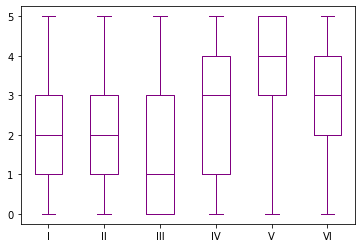

In [17]:
fig, ax = plt.subplots()
star_wars[invert_rank_cols].plot(kind = 'box', ax=ax, color = 'purple')
ax.set_xticks(range(1,7))
ax.set_xticklabels(['I','II','III','IV','V','VI'])
plt.show()

From the box plot we see that Episodes III and IV have a greater spread in the middle 50% of responses; Episode V fares the best again in terms of median score, and Episode III has the worst median ranking.

As there is quite a wide spread of rankings visible in the box plot, our next step is to analyze factors that might contribute to the variety of responses.

Respondents could rank an episode poorly because they didn't like it, or because they haven't seen it. We can investigate this further by checking the percentage of respondents who've seen each episode and comparing to the rankings.

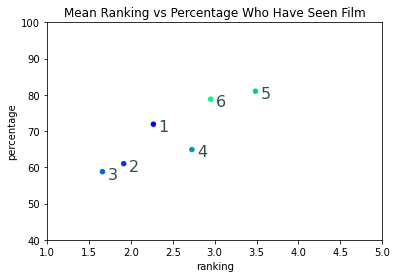

In [18]:
seen_cols = ['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6']

#Series of Percentage who've seen each movie
percent_seen = (round(star_wars[seen_cols].sum() / star_wars['seen_any'].sum() * 100, 1)
                .reset_index().rename(columns = {0: 'percentage'}))

#Series of rankings
ranks = star_wars[invert_rank_cols].mean().reset_index().rename(columns = {0 : 'ranking'})

merged = pd.merge(left = ranks, right = percent_seen, left_index = True, right_index = True)

from matplotlib import cm

fig, ax = plt.subplots()
merged.plot(kind = 'scatter', x = 'ranking', y = 'percentage', ax = ax, c = range(len(merged)), colormap = 'winter')
ax.set_title('Mean Ranking vs Percentage Who Have Seen Film')
ax.set_xlim((1,5))
ax.set_ylim((40,100))
#Labeling point with Episode number:
for index, point in merged[['ranking', 'percentage']].iterrows():
    ax.annotate(index + 1, point,
                xytext=(5,-7), textcoords='offset points',
                family='sans-serif', fontsize=16, color='darkslategrey')

plt.show()

We see that viewership indeed tends to correlate with ranking. This suggests that people may have ranked movies lower not because they saw and disliked them, but because they didn't bother seeing them. The exception is Episode I, which is relatively unpopular for its viewership, and Episode IV, which is relatively more popular.

Next we'll compare different subgroups of the respondents.

## Fans vs Non-Fans

Firstly, are fan rankings different than non-fan rankings?

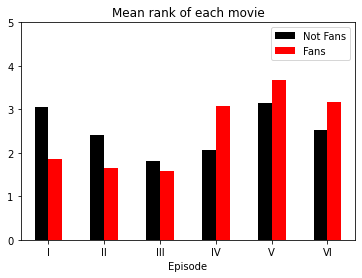

In [19]:
fan_rank_pv = (star_wars.pivot_table(values = invert_rank_cols, index = 'sw_fan')
               .transpose().rename(columns = {True:'Fans', False:'Not Fans'}))

ax = fan_rank_pv.plot(kind = 'bar', ylim = (0,5), title = 'Mean rank of each movie', color = ['black', 'red'])
ax.set_xlabel('Episode')
ax.set_xticklabels(['I','II','III','IV','V','VI'], rotation = 0)
ax.legend(title = '')
plt.show()

We can see that fans tend to prefer the originals (Episode IV-VI) to the prequels by a wide margin. For non-fans, Ep V is still the most popular, but Ep I is second most popular. Non-fans rank the prequels more generously than fans.

As we did for all respondents, we can determine what percentage of fans & non-fans have seen the films. Below we graph the percentages next to the rankings graph.

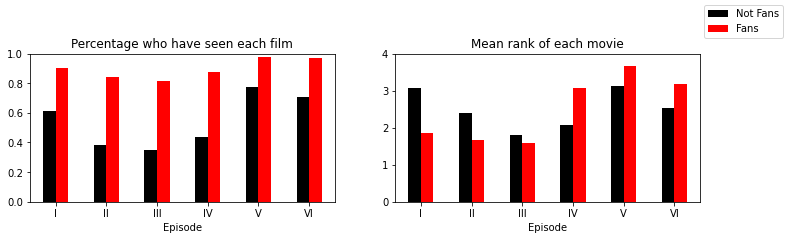

In [20]:
seen_fan_pv = (star_wars.groupby('sw_fan').agg('mean')[seen_cols].transpose()
               .rename(columns = {True:'Fans', False:'Not Fans'}))

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(2,2,1)
seen_fan_pv.plot(kind = 'bar', title = 'Percentage who have seen each film', 
                 ax = ax1, color = ['black', 'red'], legend = False)
ax1.set_xlabel('Episode')
ax1.set_xticklabels(['I','II','III','IV','V','VI'], rotation = 0)
ax1.set_ylim((0,1))

#is there an easier way to copy the figure above? can it be saved like a variable?
ax2 = fig.add_subplot(2,2,2)
fan_rank_pv.plot(kind = 'bar', title = 'Mean rank of each movie', 
                 ax = ax2, color = ['black', 'red'], legend = False)
ax2.set_xlabel('Episode')
ax2.set_xticklabels(['I','II','III','IV','V','VI'], rotation=0)
ax2.set_ylim((0,4))

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles = handles, title = '')

plt.show()

Both fans and non-fans rank the films in the same order as the percentage who have seen them. 

However, fans have seen the prequels in much higher percentages than non-fans, suggesting their rankings indicate actual dislike rather than indifference.

Surprisingly, Episode I has higher viewership than Episode IV (the original movie) in both populations.

## Gender Analysis

Are there any trends in the rankings of different genders?

In [21]:
star_wars.groupby('Gender').agg(np.mean)[['seen_any'] + seen_cols]

,seen_any,seen1,seen2,seen3,seen4,seen5,seen6
Gender,,,,,,,
Female,0.723133,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
Male,0.851107,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


A higher percentage of males (85%) than females (72%) surveyed have seen any films.

I wonder how many have seen all?

In [22]:
star_wars['seen_all'] = star_wars[seen_cols].all(axis = 1)

print('Percent surveyed who saw all:', round(star_wars['seen_all'].sum()/star_wars['seen_all'].count()*100, 1), '%')
print('Of those seeing any, percent who also saw all:', round(star_wars['seen_all'].sum()/star_wars['seen_any'].sum()*100, 1), '%')

star_wars.pivot_table(values = 'seen_all', index = 'Gender', aggfunc = 'mean')

Percent surveyed who saw all: 39.7 %
Of those seeing any, percent who also saw all: 50.3 %


,seen_all
Gender,
Female,0.335155
Male,0.561368


Overall, about 40% of respondents saw all films, and about half of those who saw one, saw all.

Similarly to the percentages for seeing one film, fewer females (34%) saw all than males (65%). However, the gap is twice as wide here than in the "seen any" percentages, suggesting that overall, males in this survey were more invested in seeing all films.


## Star Trek vs Star Wars
Next we investigate the popular (well, nerd popular) assumption that Star Wars and Star Trek fans are mutually exclusive groups. Do Star Wars fans really hate Star Wars, and vice versa?

In [23]:
print('Respondents who are Star Trek fans:' , round(star_wars['st_fan'].mean(), 2))
print('Star Wars fans who are Star Trek fans:' , round(star_wars[star_wars['sw_fan'] == True]['st_fan'].mean(), 2))
print('Respondents who are Star Wars fans:' , round(star_wars['sw_fan'].mean(), 2))
print('Star Trek fans who are Star Wars fans:' , round(star_wars[star_wars['st_fan'] == True]['sw_fan'].mean(), 2))

Respondents who are Star Trek fans: 0.4
Star Wars fans who are Star Trek fans: 0.68
Respondents who are Star Wars fans: 0.66
Star Trek fans who are Star Wars fans: 0.89


Star Wars fans are 1.5 times *more* likely to be Star Trek fans than the general survey population. In this survey, respondents were more likely to be only a Star Wars fan than only a Star Trek fan, but this could be due to self-selection of respondents.

## Age Analysis
Earlier it was noted that Episode I was seen by more respondents than Episode IV. This made me wonder if this has to do with the age demographic being surveyed - younger people are more likely to have seen the prequels first. Older people may have seen the originals and the prequels. We'll investigate below:

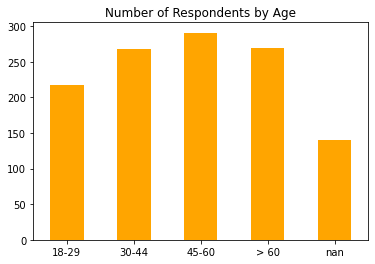

In [24]:
age_totals = star_wars['Age'].value_counts(dropna = False).iloc[[3,2,0,1,4]]

age_totals.plot.bar(title = 'Number of Respondents by Age', color = 'orange')
plt.xticks(rotation=0)
plt.show()

There is a fairly uniform spread in age, with slightly fewer respondents in the youngest category. Now we'll investigate how many in each age group have seen any film and each film.

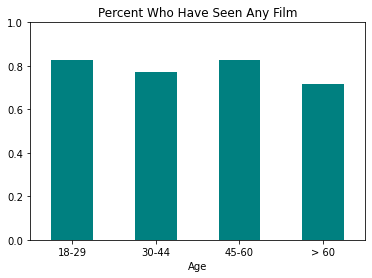

In [25]:
star_wars.groupby('Age').agg('mean')['seen_any'].plot(kind = 'bar', 
                                                      title = 'Percent Who Have Seen Any Film', 
                                                      ylim=(0,1), color = 'teal')
plt.xticks(rotation=0)
plt.show()

The age groups are also fairly uniformly distributed in having seen any of the movies; a testament to the pervasiveness of Star Wars movies in the last half century! Slightly fewer in the oldest category have seen any film.

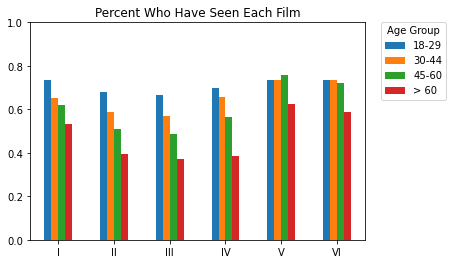

In [26]:
fig, ax = plt.subplots()
star_wars.groupby('Age').agg('mean')[seen_cols].transpose().plot(kind = 'bar' , ylim = (0,1), ax = ax,
                                                                 title = 'Percent Who Have Seen Each Film',
                                                                 legend = False)
ax.set_xticklabels(['I','II','III','IV','V','VI'], rotation=0)
fig.legend(title = 'Age Group', bbox_to_anchor=(1.1, .9))
plt.show()

From the graph we can see that there is a noticeable decline in viewership of the prequels with age group. This is also true for Episode IV. However, Episodes V and VI have been viewed more uniformly - and by more old people.

How did each age group rank the films, and does this correlate to viewership? We compare rankings and percentages below:

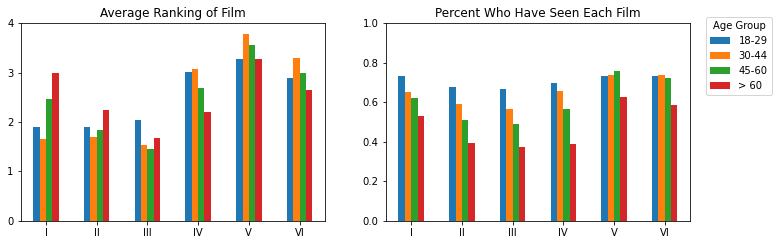

In [27]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(2,2,1)
star_wars.groupby('Age').agg('mean')[invert_rank_cols].transpose().plot(kind = 'bar' , ylim = (0,4), ax = ax1,
                                                                title = 'Average Ranking of Film',
                                                                legend = False)
ax1.set_xticklabels(['I','II','III','IV','V','VI'], rotation=0)
ax1.set_yticks(range(0,5))
fig.legend(title = 'Age Group', bbox_to_anchor=(1, .9))

ax2 = fig.add_subplot(2,2,2)
star_wars.groupby('Age').agg('mean')[seen_cols].transpose().plot(kind = 'bar' , ylim = (0,1), ax = ax2,
                                                                 title = 'Percent Who Have Seen Each Film',
                                                                 legend = False)
ax2.set_xticklabels(['I','II','III','IV','V','VI'], rotation=0)

plt.show()

We see from the left graph that all age groups ranked Episode V the highest, with VI closely behind. The age groups differ on Episodes I and IV: younger people prefer Episode IV, while older people prefer Episode I. This is surprising - I would expect older people to prefer the original movie, but in fact they seem to have seen and liked the first prequel more. The two older age groups' rankings follow their viewership, while in the two younger categories we see a similar distribution to the fans: prequels are consistently ranked lower despite more uniform viewership. (This could be due to most fans being younger.)

And nearly everyone agrees that the last two prequels are the worst.